# Поиск места бурение скважины 

## Введение 

### Задание

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

### Описание данных 

- **id** — уникальный идентификатор скважины
- **f0**, **f1**, **f2** — три признака точек (неважно, что они означают, но сами признаки значимы)
- **product** — объём запасов в скважине (тыс. баррелей)

## Подключение библиотек 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Загрузка и подготовка данных

In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

### Подготовка geo_data_0

In [3]:
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
len(geo_data_0['id'].unique())

99990

Видно что поле id содержит множество уникальных значений и, кроме того, по смыслу не может влиять на прибыль

In [6]:
geo_data_0 = geo_data_0.drop('id', axis=1)

In [7]:
def print_boxplot(data):
    for name in ['f0','f1', 'f2','product']:
        _, ax = plt.subplots(figsize=(10,6))
        ax.set_title('Признак ' + name)
        sns.boxplot(data=data, x=name)
        ax.set_xlabel('Количество ' + name)
        ax.set_ylabel(name)
        plt.show()

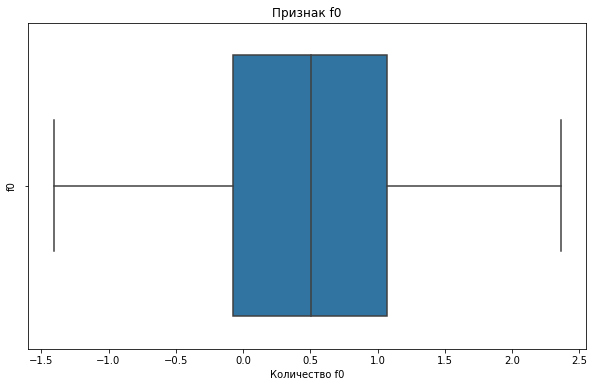

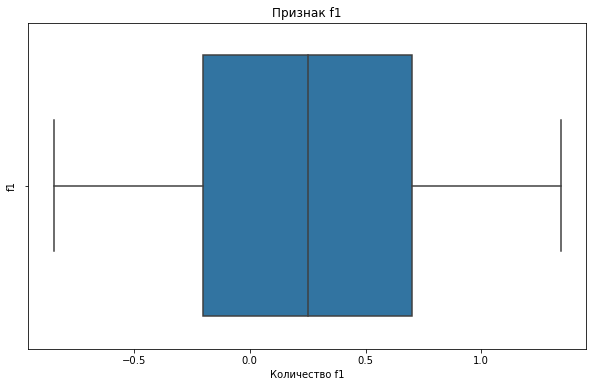

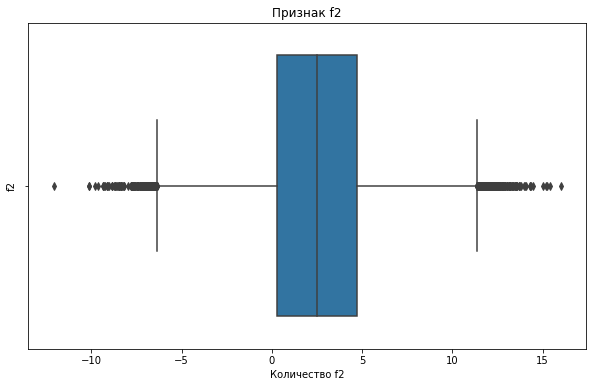

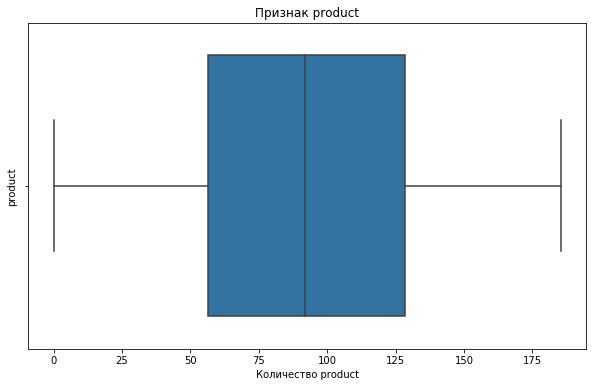

In [8]:
print_boxplot(geo_data_0)

In [9]:
def print_histplot(data):
    for name in ['f0','f1', 'f2','product']:
        _, ax = plt.subplots(figsize=(10,6))
        ax.set_title('Признак ' + name)
        sns.histplot(data=data, x=name)
        ax.set_xlabel('Количество ' + name)
        ax.set_ylabel(name)
        plt.show()

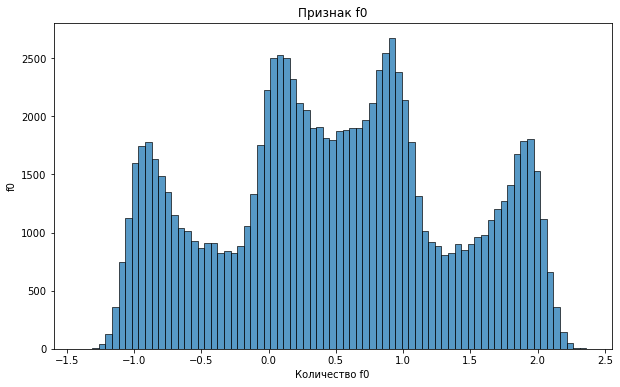

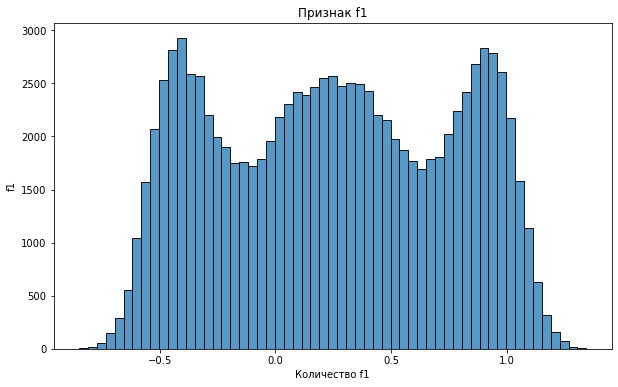

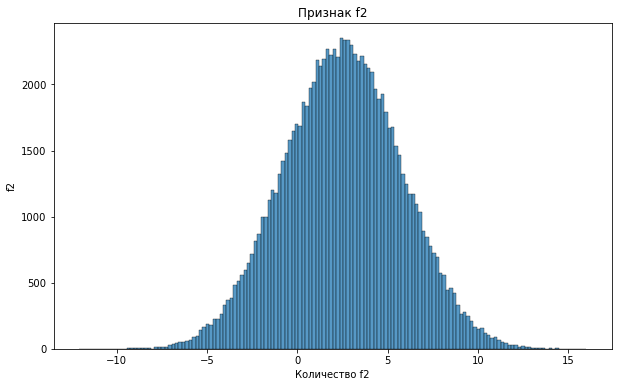

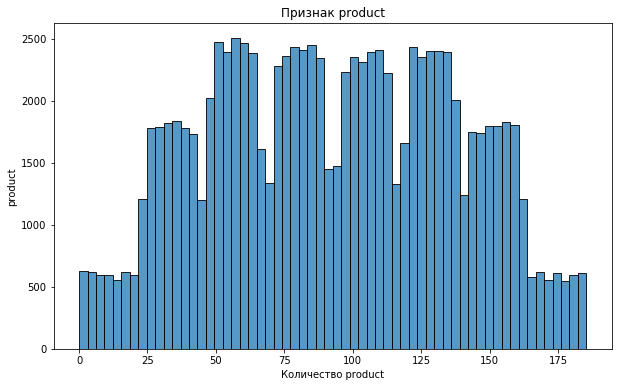

In [10]:
print_histplot(geo_data_0)

#### Вывод

Выбросы содержаться только в признаки f2, но так как их много и они расположены с обоих сторон, не будем их удалять. Также примем в расчет, что наши данные синтетические 

### Подготовка geo_data_1

In [11]:
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [12]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [13]:
len(geo_data_1['id'].unique())

99996

Видно что поле id содержит множество уникальных значений и, кроме того, по смыслу не может влиять на прибыль

In [14]:
geo_data_1 = geo_data_1.drop('id', axis=1)

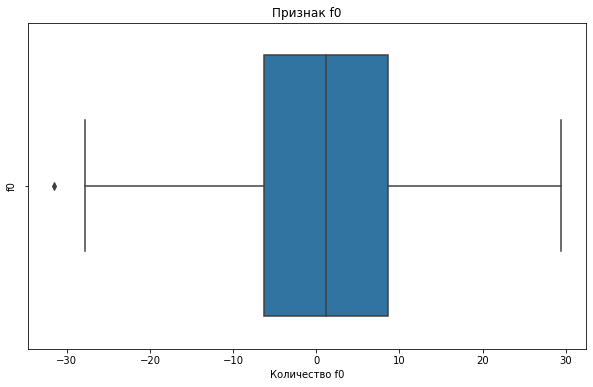

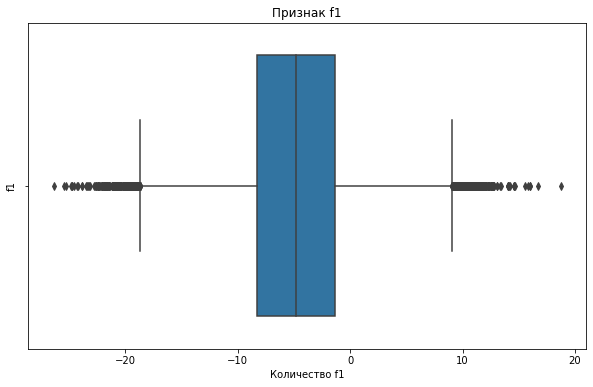

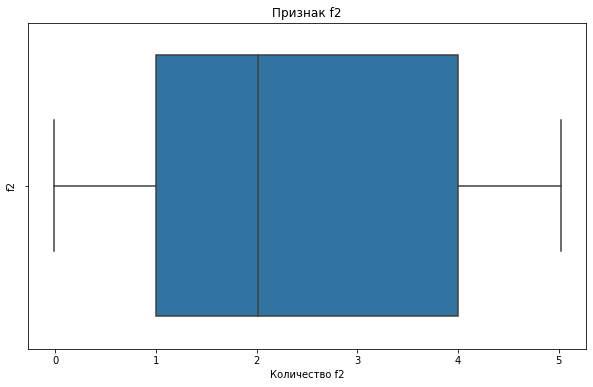

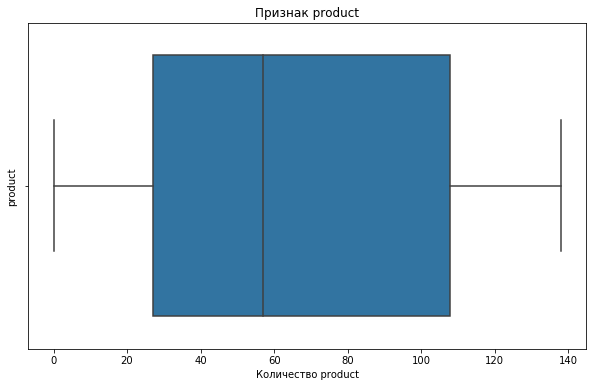

In [15]:
print_boxplot(geo_data_1)

In [16]:
geo_data_1.drop(geo_data_1[(geo_data_1['f0'] < -30)].index, inplace=True )

In [17]:
geo_data_1.reset_index(inplace=True)

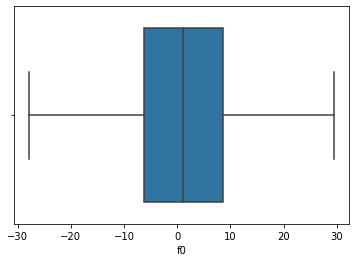

In [18]:
sns.boxplot(data=geo_data_1, x='f0')

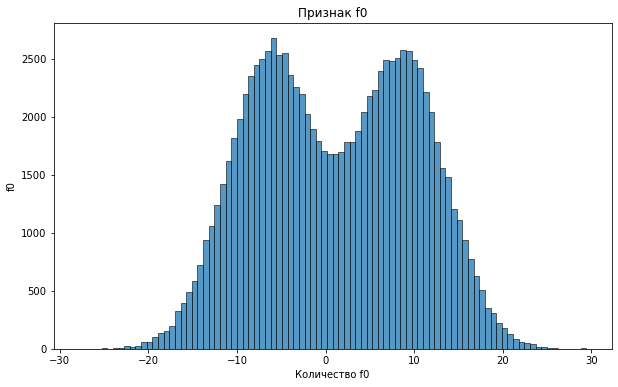

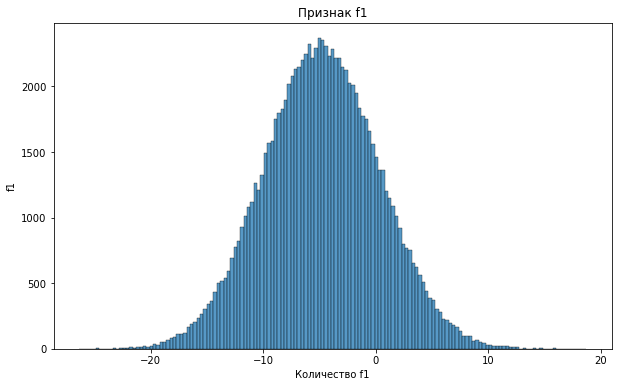

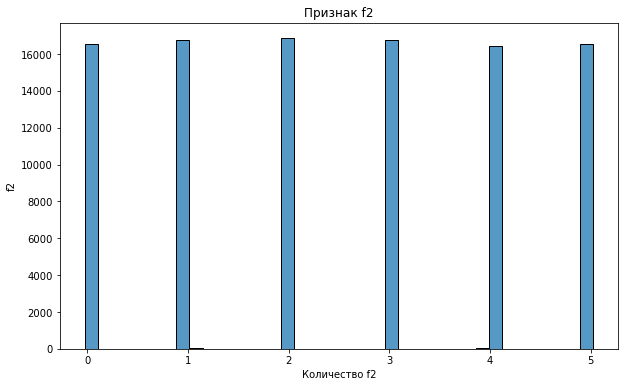

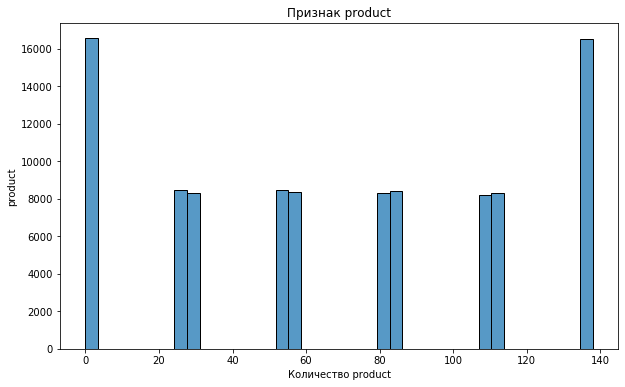

In [19]:
print_histplot(geo_data_1)

#### Вывод

Выбросы содержат признаки f2 и f0, но так как в f2 их много и они расположены с обоих сторон, не будем их удалять. Также примем в расчет, что наши данные синтетические 

### Подготовка geo_data_2

In [20]:
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [21]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [22]:
len(geo_data_2['id'].unique())

99996

Видно что поле id содержит множество уникальных значений и, кроме того, по смыслу не может влиять на прибыль

In [23]:
geo_data_2 = geo_data_2.drop('id', axis=1)

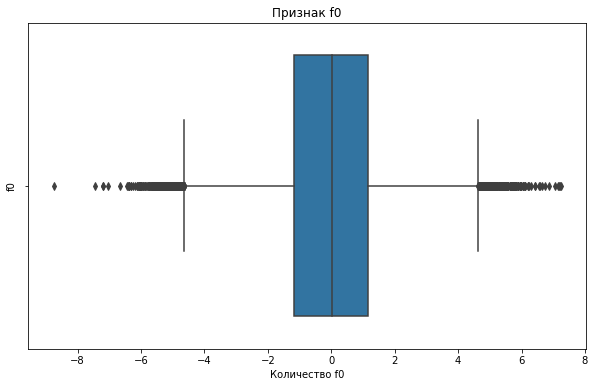

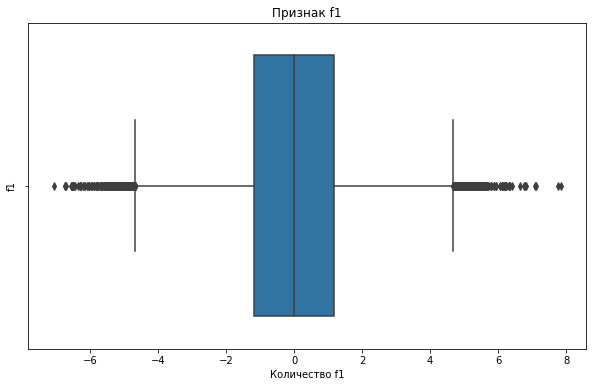

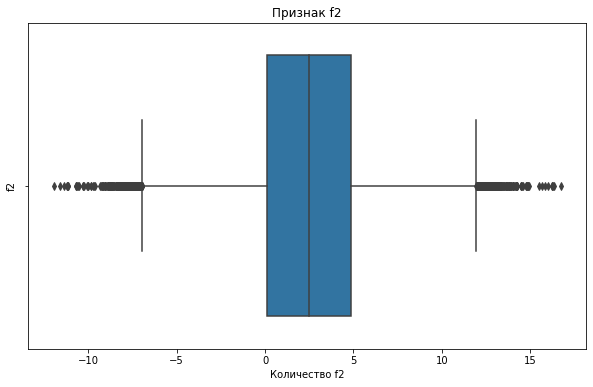

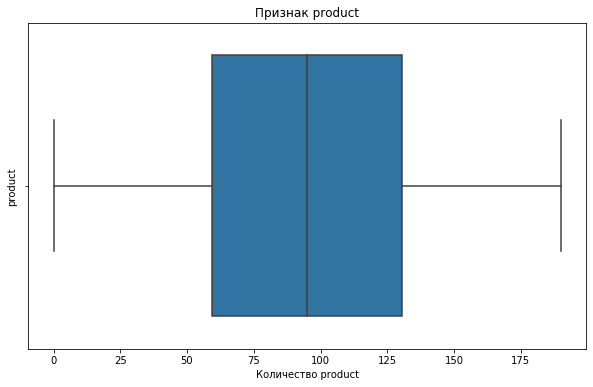

In [24]:
print_boxplot(geo_data_2)

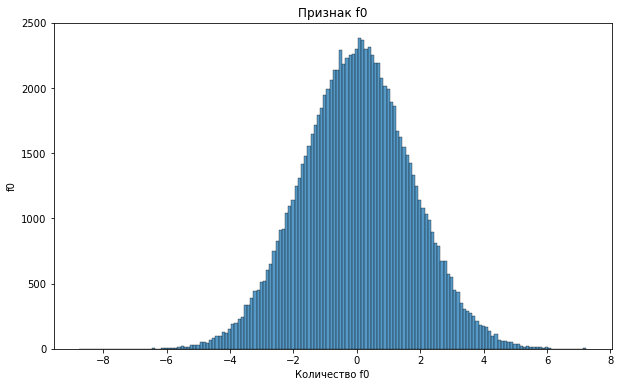

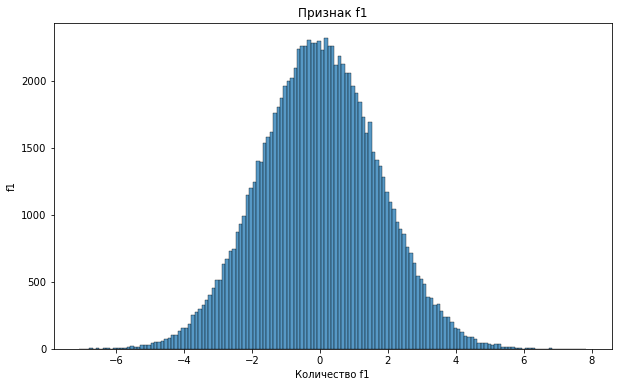

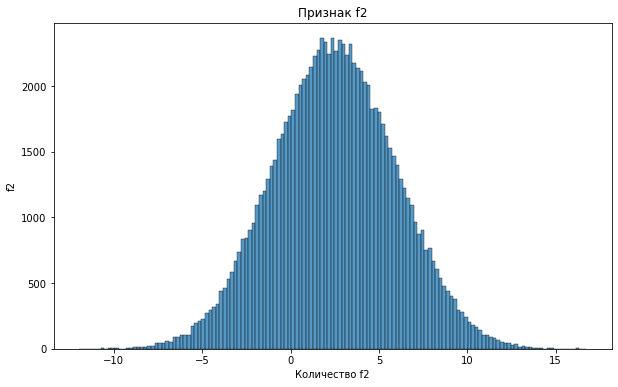

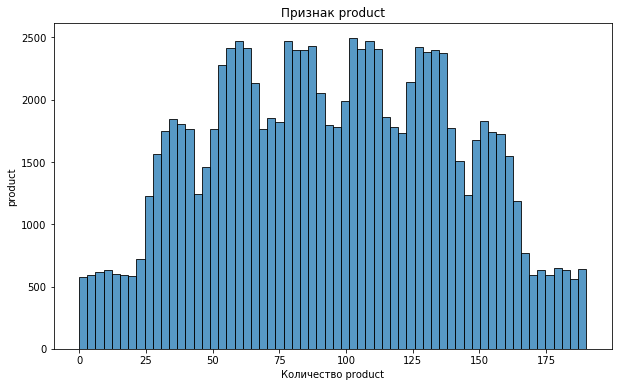

In [25]:
print_histplot(geo_data_2)

#### Вывод

Выбросы содержаться во всех признаках, но так как их много и они расположены с обоих сторон, не будем их удалять. Также примем в расчет, что наши данные синтетические 

## Обучение и проверка модели

In [26]:
def split_x_y(data, column):
    x = data.drop(column, axis=1)
    y = data[column]
    return x, y

In [27]:
def my_train_test_split(data):
    df_train, df_test = train_test_split(data, test_size=0.25, random_state=12345)
    
    df_train_x, df_train_y = split_x_y(df_train,'product')
    df_test_x, df_test_y = split_x_y(df_test,'product')
    
    return df_train_x, df_train_y, df_test_x, df_test_y

In [28]:
def train_linear_regression(train_x, train_y):
    model = LinearRegression()
    model.fit(train_x, train_y)
    return model

In [29]:
def get_RMSE(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return mse ** 0.5

In [30]:
def get_scores(model, test_x, test_y):
    predicted_valid = model.predict(test_x)
    
    R2 = r2_score(test_y, predicted_valid)
    
    RMSE = get_RMSE(test_y, predicted_valid)
    
    mean = predicted_valid.mean()
    
    return RMSE, R2, mean

In [31]:
def get_linear_regression_model(data):
    train_x, train_y, test_x, test_y = my_train_test_split(data)
    model = train_linear_regression(train_x, train_y)
    RMSE, R2, mean = get_scores(model, test_x, test_y)
    
    print('mean = ', mean)
    print('RMSE = ', RMSE)
    print('R2 = ', R2)
    
    return model

### Модель для geo_data_0

In [32]:
geo0_model = get_linear_regression_model(geo_data_0)

mean =  92.59256778438035
RMSE =  37.5794217150813
R2 =  0.27994321524487786


#### Вывод

Средний объем сырья для скважины данного региона лежит в диапазоне 92.59256778438035 ± 37.5794217150813. Такая оценка не много лучше, чем оценка средним, так-как  R2 чуть больше нуля 0.27994321524487786

### Модель для geo_data_1

In [33]:
geo1_model = get_linear_regression_model(geo_data_1)

mean =  68.50819619171504
RMSE =  0.8903673252136487
R2 =  0.9996248393695054


#### Вывод

Средний объем сырья для скважины данного региона лежит в диапазоне 68.50819619171504 ± 0.8903673252136487. Такая оценка на много лучше, чем оценка средним, так-как  R2 близко к единицы 0.9996248393695054

### Модель для geo_data_2

In [34]:
geo2_model = get_linear_regression_model(geo_data_2)

mean =  94.96504596800489
RMSE =  40.02970873393434
R2 =  0.20524758386040443


#### Вывод

Средний объем сырья для скважины данного региона лежит в диапазоне 94.96504596800489 ± 40.02970873393434. Такая оценка не много лучше, чем оценка средним, так-как  R2 чуть больше нуля 0.20524758386040443

# 3. Подготовка к расчёту прибыли

In [35]:
budget = 10000000000
cost_of_item = 450000

## Достаточный объём сырья для безубыточной разработки

Чтобы разработка была безубыточной достаточно заработать больше потраченного бюджета. Из формуле БЮДЖЕТ = ОБЪЕМ СЫРЬЯ * ДОХОД С ЕДИНИЦЫ ПРОДУКТА получим  ОБЪЕМ СЫРЬЯ =  БЮДЖЕТ /  ДОХОД С ЕДИНИЦЫ ПРОДУКТА

In [36]:
(budget / 200)  / cost_of_item

111.11111111111111

In [37]:
geo_data_0['product'].mean()

92.50000000000001

In [38]:
geo_data_1['product'].mean()

68.82457832431618

In [39]:
geo_data_2['product'].mean()

95.00000000000004

## Вывод

Необходимая прибыль для покрытия бюджета составляет 111.11111111111111. Для первого региона средний запас сырья по предсказанию модели равен  92.59256778438035 ± 37.5794217150813. Для второго 68.50819619171504 ± 0.8903673252136487, а для третьего 94.96504596800489 ± 40.02970873393434. Видно, что все три региона не покрывают расходы если выработка будет приносить средний доход (при условии бурения 200 скважин). 

# 4. Функция для расчёта прибыли

In [40]:
def profit(target, predict, count):
    
    predict = pd.Series(predict)
    target.reset_index(drop=True, inplace=True)
    
    predict_sorted = predict.sort_values(ascending=False )
    selected = target[predict_sorted.index][:count]
    
    return (cost_of_item * selected.sum()) - budget

In [41]:
def split_x_y(data):
    x = data.drop(['product'], axis=1)
    y = data['product']
    return x, y

# 5. Расчёт прибыли и рисков 

In [42]:
def bootstrap(model, data):
    state = np.random.RandomState(12345)
 
    values = []
    data, target = split_x_y(data)
    
    predictions = model.predict(data)
 
    for i in range(1000):
        target_subsample = target.sample(500, replace = True, random_state=state)
        predictions_subsample = predictions[target_subsample.index]
        values.append(profit(target_subsample, predictions_subsample, 200))
        
    return values

In [43]:
def get_interval(data):
    lower = data.quantile(0.025)
    upper = data.quantile(0.975)
    return data.loc[(data > lower) & (data < upper) ], lower, upper

In [44]:
def get_rick(data):
    tmp = data.loc[data < 0 ]
    tmp = len(tmp) / 1000
    return tmp * 100

In [ ]:
def report(geo0_model, geo_data_0)

## Регион geo_data_0

In [45]:
geo0_distribution = bootstrap(geo0_model, geo_data_0)

In [46]:
geo0_distribution = pd.Series(geo0_distribution)

In [47]:
geo0_distribution.mean()

424149751.4045051

In [48]:
geo0_distribution, lower, upper = get_interval(geo0_distribution)

In [49]:
get_rick(geo0_distribution)

2.7

## Регион geo_data_1

In [51]:
geo1_distribution = bootstrap(geo1_model, geo_data_1)

In [52]:
geo1_distribution = pd.Series(geo1_distribution)

In [53]:
geo1_distribution.mean()

443042044.067215

In [54]:
geo1_distribution, lower, upper = get_interval(geo1_distribution)

In [55]:
get_rick(geo1_distribution)

0.0

## Регион geo_data_2

In [56]:
geo2_distribution = bootstrap(geo2_model, geo_data_2)

In [57]:
geo2_distribution = pd.Series(geo2_distribution)

In [58]:
geo2_distribution.mean()

373939021.9898518

In [59]:
geo2_distribution, lower, upper = get_interval(geo2_distribution)

In [60]:
get_rick(geo2_distribution)

6.7

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [ ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [ ]  Модели обучены, предсказания сделаны
    - [ ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [ ]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован